In [1]:
%matplotlib inline
import numpy as np
from Settings import *
from Agent import *
from Obstacles import *
from Foods import *
from World import *  
import matplotlib.pyplot as plt
%matplotlib inline
Settings.SetBlockSize(100)

In [2]:
#Add pictures for items
Settings.AddImage('Wall','Pics/wall.jpg')
Settings.AddImage('Food','Pics/food.jpg')

#Create Probability distribution matrices (PDMs)
obs = np.zeros(Settings.WorldSize)
agnts = np.zeros(Settings.WorldSize)
food = np.zeros(Settings.WorldSize)

# Obstacles can appear from 3rd to 7th row and 5th column
obs[3:8,5] = 1 
agnts[2,[0,10]] = 1
food[:,4:7] = 1

#Add PDMs to Settings
Settings.AddProbabilityDistribution('Obs',obs) 
Settings.AddProbabilityDistribution('agnts',agnts)
Settings.AddProbabilityDistribution('food',food)

#Create World Elements
#Create vertical obastacle with length 4
obshape = np.array([[1],[1],[1],[1]]) 
obs = Obstacles('Wall',Shape=obshape,PdstName='Obs')

#Create two agents
ragnt = Agent(Fname='Pics/ragent.jpg',PdstName='agnts')
gagnt = Agent(Fname='Pics/gagent.jpg',PdstName='agnts')
food = Foods('Food',PdstName='food')

#Reward food by 10, time step by -0.1
game = World(RewardsScheme=[0,10,-0.1])

#Adding Agents in Order of Following the action
game.AddAgents([ragnt,gagnt])
game.AddObstacles([obs])
game.AddFoods([food])

#Execute at the beginning of every episode
game.GenerateWorld()
game.Step()
plt.imshow(game.BuildImage())

#Execute every time step
ragnt.NextAction = Settings.PossibleActions[2]
gagnt.NextAction = Settings.PossibleActions[3]
game.Step()

/home/aqeel/miniconda3/envs/PT/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


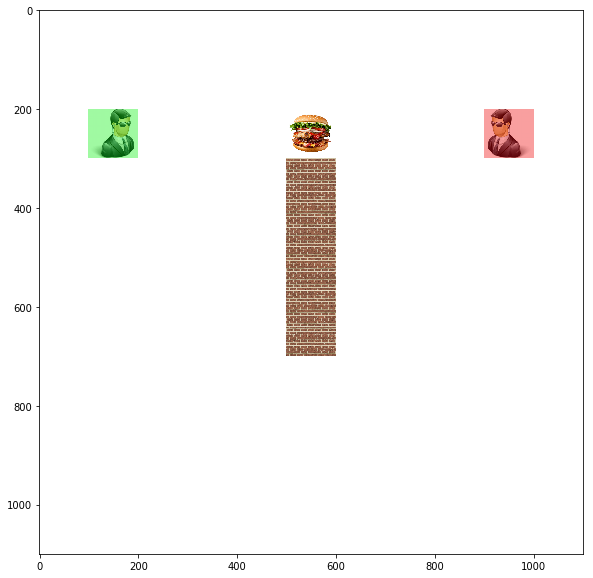

In [4]:
plt.figure(figsize=Settings.FigureSize)
plt.imshow(game.BuildImage())